# "[BOAZ] Deeplab V3 Learning Process"
> "BOAZ Base session Mini Project"

- toc: true
- branch: master
- badges: true
- comments: true
- author: Rauk
- categories: [BOAZ, Deeplearning]

## 논문 데이터 구현 (VOC 2012 Dataset)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!git clone https://github.com/chenxi116/DeepLabv3.pytorch.git

Cloning into 'DeepLabv3.pytorch'...
remote: Enumerating objects: 31, done.
remote: Total 31 (delta 0), reused 0 (delta 0), pack-reused 31
Unpacking objects: 100% (31/31), done.


In [ ]:
%cd DeepLabv3.pytorch/

/content/DeepLabv3.pytorch


## Get_Pretrained_model

In [ ]:
!wget https://cs.jhu.edu/~cxliu/data/deeplab_resnet101_pascal_v3_bn_lr7e-3_epoch50.pth -P data/

--2021-12-11 09:38:02--  https://cs.jhu.edu/~cxliu/data/deeplab_resnet101_pascal_v3_bn_lr7e-3_epoch50.pth
Resolving cs.jhu.edu (cs.jhu.edu)... 128.220.13.64
Connecting to cs.jhu.edu (cs.jhu.edu)|128.220.13.64|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.cs.jhu.edu/~cxliu/data/deeplab_resnet101_pascal_v3_bn_lr7e-3_epoch50.pth [following]
--2021-12-11 09:38:02--  https://www.cs.jhu.edu/~cxliu/data/deeplab_resnet101_pascal_v3_bn_lr7e-3_epoch50.pth
Resolving www.cs.jhu.edu (www.cs.jhu.edu)... 128.220.13.64
Connecting to www.cs.jhu.edu (www.cs.jhu.edu)|128.220.13.64|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 464941444 (443M)
Saving to: ‘data/deeplab_resnet101_pascal_v3_bn_lr7e-3_epoch50.pth’

deeplab_resnet101_p 100%[===================>] 443.40M  34.0MB/s    in 14s     

2021-12-11 09:38:17 (32.5 MB/s) - ‘data/deeplab_resnet101_pascal_v3_bn_lr7e-3_epoch50.pth’ saved [464941444/464941444]



In [ ]:
%cd data
!wget http://host.robots.ox.ac.uk/pascal/VOC/voc2012/VOCtrainval_11-May-2012.tar
!tar -xf VOCtrainval_11-May-2012.tar
%cd VOCdevkit/VOC2012/
!wget http://cs.jhu.edu/~cxliu/data/SegmentationClassAug.zip
!wget http://cs.jhu.edu/~cxliu/data/SegmentationClassAug_Visualization.zip
!wget http://cs.jhu.edu/~cxliu/data/list.zip
!unzip SegmentationClassAug.zip
!unzip SegmentationClassAug_Visualization.zip
!unzip list.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: SegmentationClassAug_Visualization/2008_003323.png  
  inflating: SegmentationClassAug_Visualization/2009_005229.png  
  inflating: SegmentationClassAug_Visualization/2008_004123.png  
  inflating: SegmentationClassAug_Visualization/2010_003333.png  
  inflating: SegmentationClassAug_Visualization/2011_001989.png  
  inflating: SegmentationClassAug_Visualization/2010_001320.png  
  inflating: SegmentationClassAug_Visualization/2010_001343.png  
  inflating: SegmentationClassAug_Visualization/2008_004564.png  
  inflating: SegmentationClassAug_Visualization/2008_002124.png  
  inflating: SegmentationClassAug_Visualization/2009_001323.png  
  inflating: SegmentationClassAug_Visualization/2009_002567.png  
  inflating: SegmentationClassAug_Visualization/2010_005345.png  
  inflating: SegmentationClassAug_Visualization/2008_006052.png  
  inflating: SegmentationClassAug_Visualization/2008_002791.png  
  inflating: SegmentationClassAug_Visual

In [ ]:
%cd /content/DeepLabv3.pytorch/

/content/DeepLabv3.pytorch


In [ ]:
!wget https://cs.jhu.edu/~cxliu/data/deeplab_resnet101_pascal_v3_bn_lr7e-3_epoch50.pth -P data/

--2021-12-19 14:55:23--  https://cs.jhu.edu/~cxliu/data/deeplab_resnet101_pascal_v3_bn_lr7e-3_epoch50.pth
Resolving cs.jhu.edu (cs.jhu.edu)... 128.220.13.64
Connecting to cs.jhu.edu (cs.jhu.edu)|128.220.13.64|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.cs.jhu.edu/~cxliu/data/deeplab_resnet101_pascal_v3_bn_lr7e-3_epoch50.pth [following]
--2021-12-19 14:55:24--  https://www.cs.jhu.edu/~cxliu/data/deeplab_resnet101_pascal_v3_bn_lr7e-3_epoch50.pth
Resolving www.cs.jhu.edu (www.cs.jhu.edu)... 128.220.13.64
Connecting to www.cs.jhu.edu (www.cs.jhu.edu)|128.220.13.64|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 464941444 (443M)
Saving to: ‘data/deeplab_resnet101_pascal_v3_bn_lr7e-3_epoch50.pth’

deeplab_resnet101_p 100%[===================>] 443.40M  71.6MB/s    in 6.4s    

2021-12-19 14:55:30 (69.4 MB/s) - ‘data/deeplab_resnet101_pascal_v3_bn_lr7e-3_epoch50.pth’ saved [464941444/464941444]



## Evaluation with Pretrained Model

In [ ]:
!python main.py --exp bn_lr7e-3 --epochs 50 --base_lr 0.007 --batch_size 12 --crop_size 400

eval: 1/1449
eval: 2/1449
eval: 3/1449
eval: 4/1449
eval: 5/1449
eval: 6/1449
eval: 7/1449
eval: 8/1449
eval: 9/1449
eval: 10/1449
eval: 11/1449
eval: 12/1449
eval: 13/1449
eval: 14/1449
eval: 15/1449
eval: 16/1449
eval: 17/1449
eval: 18/1449
eval: 19/1449
eval: 20/1449
eval: 21/1449
eval: 22/1449
eval: 23/1449
eval: 24/1449
eval: 25/1449
eval: 26/1449
eval: 27/1449
eval: 28/1449
eval: 29/1449
eval: 30/1449
eval: 31/1449
eval: 32/1449
eval: 33/1449
eval: 34/1449
eval: 35/1449
eval: 36/1449
eval: 37/1449
eval: 38/1449
eval: 39/1449
eval: 40/1449
eval: 41/1449
eval: 42/1449
eval: 43/1449
eval: 44/1449
eval: 45/1449
eval: 46/1449
eval: 47/1449
eval: 48/1449
eval: 49/1449
eval: 50/1449
eval: 51/1449
eval: 52/1449
eval: 53/1449
eval: 54/1449
eval: 55/1449
eval: 56/1449
eval: 57/1449
eval: 58/1449
eval: 59/1449
eval: 60/1449
eval: 61/1449
eval: 62/1449
eval: 63/1449
eval: 64/1449
eval: 65/1449
eval: 66/1449
eval: 67/1449
eval: 68/1449
eval: 69/1449
eval: 70/1449
eval: 71/1449
eval: 72/1449
e

In [ ]:
%cd /content/DeepLabv3.pytorch/data

/content/DeepLabv3.pytorch/data


In [ ]:
!mkdir val

In [ ]:
import cv2
import matplotlib.pyplot as plt
import os
%matplotlib inline

img shape: (366, 500, 3)


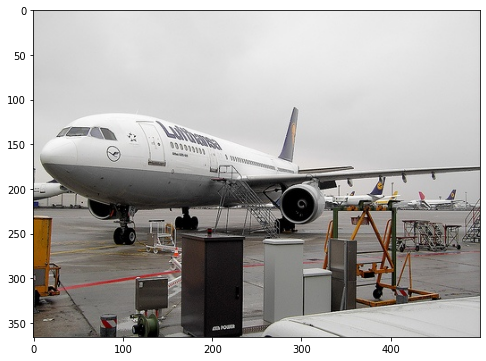

In [ ]:
default_dir = '/content/DeepLabv3.pytorch/data'
img = cv2.imread(os.path.join(default_dir, 'VOCdevkit/VOC2012/JPEGImages/2007_000033.jpg'))
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print('img shape:', img.shape)

plt.figure(figsize=(8, 8))
plt.imshow(img_rgb)
plt.show()

img shape: (366, 500, 3)


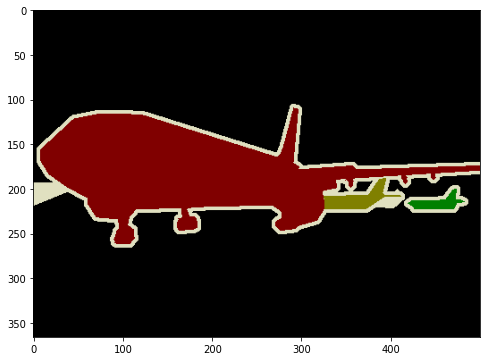

In [ ]:
img = cv2.imread(os.path.join(default_dir, 'VOCdevkit/VOC2012/SegmentationObject/2007_000033.png'))
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print('img shape:', img.shape)

plt.figure(figsize=(8, 8))
plt.imshow(img_rgb)
plt.show()

img shape: (513, 513, 3)


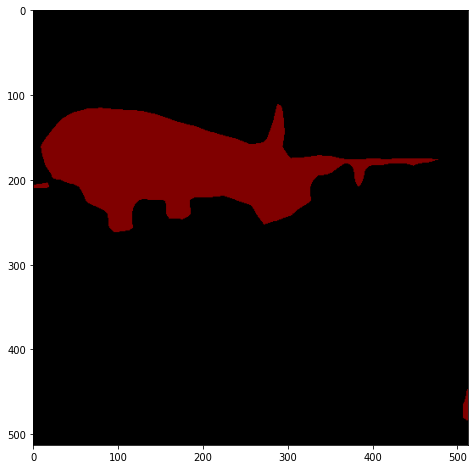

In [ ]:
img = cv2.imread(os.path.join(default_dir, 'val/2007_000033.png'))
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print('img shape:', img.shape)

plt.figure(figsize=(8, 8))
plt.imshow(img_rgb)
plt.show()

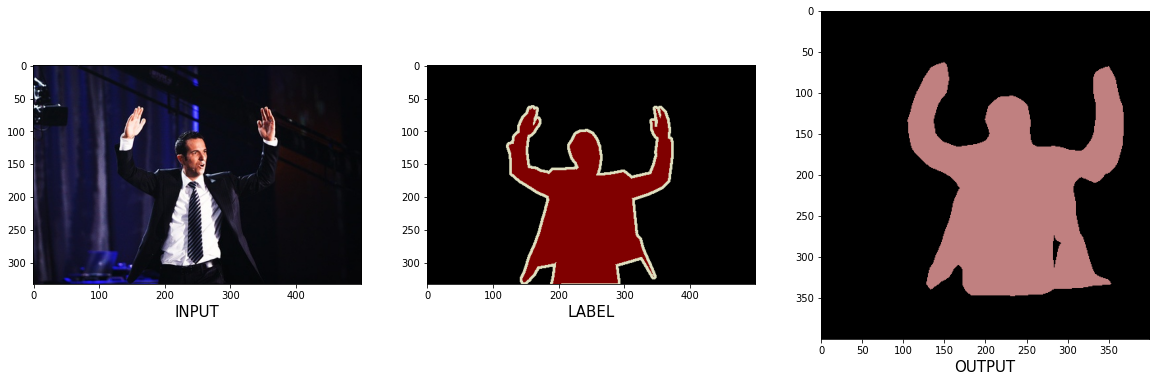

In [ ]:
default_dir = '/content/DeepLabv3.pytorch/data'
img1 = cv2.imread(os.path.join(default_dir, 'VOCdevkit/VOC2012/JPEGImages/2007_001423.jpg'))
img2 = cv2.imread(os.path.join(default_dir, 'VOCdevkit/VOC2012/SegmentationObject/2007_001423.png'))
img3 = cv2.imread(os.path.join(default_dir, 'val/2007_001423.png'))

img1_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img3_rgb = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20, 20))

ax1 = plt.subplot(1, 3, 1)
ax1.imshow(img1_rgb)
plt.xlabel("INPUT", size = 15)

ax2 = plt.subplot(1, 3, 2)
ax2.imshow(img2_rgb)
plt.xlabel("LABEL", size = 15)

ax3 = plt.subplot(1, 3, 3)
ax3 = plt.imshow(img3_rgb)
plt.xlabel("OUTPUT", size = 15)

plt.show()

## Covid_Mask_fail

In [ ]:
%cd /content/DeepLabv3.pytorch

/content/DeepLabv3.pytorch


In [ ]:
!cp -r /content/drive/MyDrive/deeplab/covid_mask.py /content/DeepLabv3.pytorch/covid_mask.py
!cp -r /content/drive/MyDrive/deeplab/main.py /content/DeepLabv3.pytorch/main.py

In [ ]:
!cp -r /content/drive/MyDrive/archive /content/DeepLabv3.pytorch/data/archive

## Learning 

In [ ]:
!python main.py --train --dataset covid_mask --exp bn_lr7e-3 --epochs 50 --base_lr 0.01 --batch_size 12

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
epoch: 1	iter: 1/19	lr: 0.010000	loss: 15.2245 (15.2245)
epoch: 1	iter: 2/19	lr: 0.009991	loss: 13.2159 (15.2044)
epoch: 1	iter: 3/19	lr: 0.009981	loss: 10.9538 (15.1619)
epoch: 1	iter: 4/19	lr: 0.009972	loss: 8.0630 (15.0909)
epoch: 1	iter: 5/19	lr: 0.009962	loss: 5.2944 (14.9930)
epoch: 1	iter: 6/19	lr: 0.009953	loss: 2.7867 (14.8709)
epoch: 1	iter: 7/19	lr: 0.009943	loss: 1.9044 (14.7412)
epoch: 1	iter: 8/19	lr: 0.009934	loss: 1.4536 (14.6083)
epoch: 1	iter: 9/19	lr: 0.009924	loss: 1.5100 (14.4774)
epoch: 1	iter: 10/19	lr: 0.009915	los

## Checking

In [ ]:
!pwd

/content/DeepLabv3.pytorch


In [ ]:
!cp -r /content/DeepLabv3.pytorch/data/archive/images /content/DeepLabv3.pytorch/data/val

In [ ]:
!python main.py --dataset covid_mask --exp bn_lr7e-3 --epochs 1 --base_lr 0.007 --batch_size 12

eval: 1/222
eval: 2/222
eval: 3/222
eval: 4/222
eval: 5/222
eval: 6/222
eval: 7/222
eval: 8/222
eval: 9/222
eval: 10/222
eval: 11/222
eval: 12/222
eval: 13/222
eval: 14/222
eval: 15/222
eval: 16/222
eval: 17/222
eval: 18/222
eval: 19/222
eval: 20/222
eval: 21/222
eval: 22/222
eval: 23/222
eval: 24/222
eval: 25/222
eval: 26/222
eval: 27/222
eval: 28/222
eval: 29/222
eval: 30/222
eval: 31/222
eval: 32/222
eval: 33/222
eval: 34/222
eval: 35/222
eval: 36/222
eval: 37/222
eval: 38/222
eval: 39/222
eval: 40/222
eval: 41/222
eval: 42/222
eval: 43/222
eval: 44/222
eval: 45/222
eval: 46/222
eval: 47/222
eval: 48/222
eval: 49/222
eval: 50/222
eval: 51/222
eval: 52/222
eval: 53/222
eval: 54/222
eval: 55/222
eval: 56/222
eval: 57/222
eval: 58/222
eval: 59/222
eval: 60/222
eval: 61/222
eval: 62/222
eval: 63/222
eval: 64/222
eval: 65/222
eval: 66/222
eval: 67/222
eval: 68/222
eval: 69/222
eval: 70/222
eval: 71/222
eval: 72/222
eval: 73/222
eval: 74/222
eval: 75/222
eval: 76/222
eval: 77/222
eval: 78

img shape: (1280, 1920, 3)


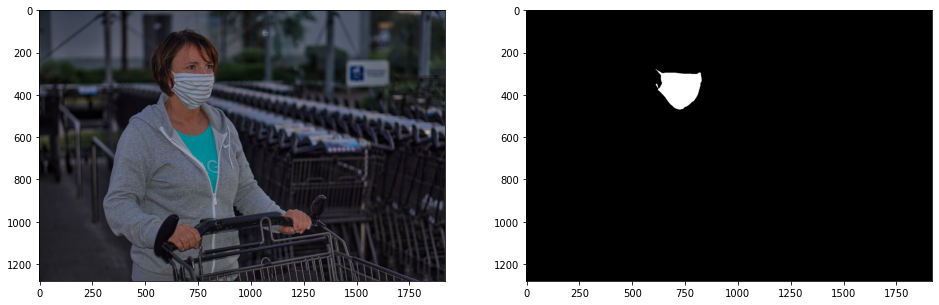

In [ ]:
import cv2
import matplotlib.pyplot as plt
import os
%matplotlib inline

img1 = cv2.imread('/content/DeepLabv3.pytorch/data/val/mouth-guard-5060809_1920.jpg')
img2 = cv2.imread('/content/DeepLabv3.pytorch/data/archive/masks/mouth-guard-5060809_1920.png')

img1_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

print('img shape:', img1.shape)
print('img shape:', img2.shape)

plt.figure(figsize=(16, 16))

ax1 = plt.subplot(1, 2, 1) 
plt.imshow(img1_rgb)

ax2 = plt.subplot(1, 2, 2) 
plt.imshow(img2_rgb)

plt.show()


## ?

img shape: (513, 513, 3)


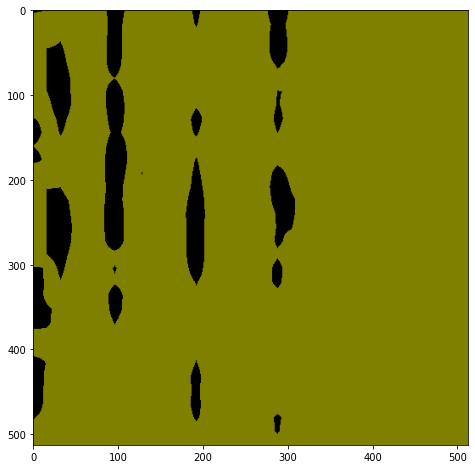

In [ ]:
img = cv2.imread('/content/DeepLabv3.pytorch/data/val/mouth-guard-5060809_1920.png')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print('img shape:', img.shape)

plt.figure(figsize=(8, 8))
plt.imshow(img_rgb)
plt.show()

## 다르므름ㄹ

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp -r /content/drive/MyDrive/archive /content/archive

In [ ]:
%cd /content/archive

/content/archive


In [ ]:
from torchvision import models

deeplab = models.segmentation.deeplabv3_resnet101(pretrained=True).eval()

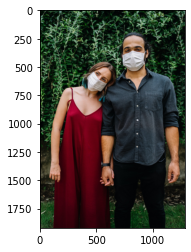

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import torch

img = Image.open('/content/archive/images/pexels-anna-tarazevich-6027374.jpg')
plt.imshow(img); plt.show()

In [ ]:
import torchvision.transforms as T
from PIL import Image

transform = T.Compose([T.Resize(400), T.CenterCrop(513), T.ToTensor(),
                 T.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225])])

# Resize, Centercrop 등 ToTensor 를 제외한 수치들은 Image 에 맞게 바꿔주시면 됩니다.

inp = transform(img).unsqueeze(0)

In [ ]:
# Pass the input through the net
out = deeplab(inp)['out']
print (out.shape)

torch.Size([1, 21, 513, 513])


In [ ]:
import numpy as np
om = torch.argmax(out.squeeze(), dim=0).detach().cpu().numpy()
print (om.shape)
print (np.unique(om))

(513, 513)
[ 0 15]


In [ ]:
# Define the helper function
def decode_segmap(image, nc=21):
  
  label_colors = np.array([(0, 0, 0),  # 0=background
               # 1=aeroplane, 2=bicycle, 3=bird, 4=boat, 5=bottle
               (128, 0, 0), (0, 128, 0), (128, 128, 0), (0, 0, 128), (128, 0, 128),
               # 6=bus, 7=car, 8=cat, 9=chair, 10=cow
               (0, 128, 128), (128, 128, 128), (64, 0, 0), (192, 0, 0), (64, 128, 0),
               # 11=dining table, 12=dog, 13=horse, 14=motorbike, 15=person
               (192, 128, 0), (64, 0, 128), (192, 0, 128), (64, 128, 128), (192, 128, 128),
               # 16=potted plant, 17=sheep, 18=sofa, 19=train, 20=tv/monitor
               (0, 64, 0), (128, 64, 0), (0, 192, 0), (128, 192, 0), (0, 64, 128)])

  r = np.zeros_like(image).astype(np.uint8)
  g = np.zeros_like(image).astype(np.uint8)
  b = np.zeros_like(image).astype(np.uint8)
  
  for l in range(0, nc):
    idx = image == l
    r[idx] = label_colors[l, 0]
    g[idx] = label_colors[l, 1]
    b[idx] = label_colors[l, 2]
    
  rgb = np.stack([r, g, b], axis=2)
  return rgb

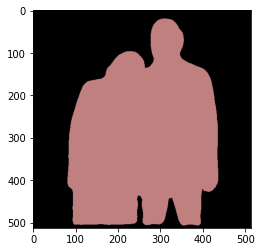

In [ ]:
rgb = decode_segmap(om)
plt.imshow(rgb); plt.show()

## Covid_Mask_Success

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!git clone https://github.com/msminhas93/DeepLabv3FineTuning.git

Cloning into 'DeepLabv3FineTuning'...
remote: Enumerating objects: 349, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 349 (delta 2), reused 3 (delta 0), pack-reused 340
Receiving objects: 100% (349/349), 4.09 MiB | 16.68 MiB/s, done.
Resolving deltas: 100% (23/23), done.


In [ ]:
%cd /content

/content


In [ ]:
%cd /content/DeepLabv3FineTuning

/content/DeepLabv3FineTuning


In [ ]:
!mkdir archive2

In [ ]:
!cp -r /content/drive/MyDrive/archive2 /content/DeepLabv3FineTuning/archive2

In [ ]:
!python main.py --data-directory archive2 --exp_directory val

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Epoch 1/20
----------
100% 45/45 [03:59<00:00,  5.32s/it]
Train Loss: 0.0559
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
100% 11/11 

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x512 at 0x7F26D64B4ED0>
Using GPU!
[[ 2.2541602   2.2541602   2.2541602  ...  7.1043715   7.1043715
   7.1043715 ]
 [ 2.2541602   2.2541602   2.2541602  ...  7.1043715   7.1043715
   7.1043715 ]
 [ 2.2541602   2.2541602   2.2541602  ...  7.1043715   7.1043715
   7.1043715 ]
 ...
 [-0.52397954 -0.52397954 -0.52397954 ... -1.3202007  -1.3202007
  -1.3202007 ]
 [-0.52397954 -0.52397954 -0.52397954 ... -1.3202007  -1.3202007
  -1.3202007 ]
 [-0.52397954 -0.52397954 -0.52397954 ... -1.3202007  -1.3202007
  -1.3202007 ]]
7621312.0


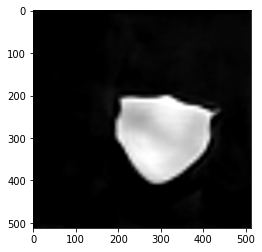

In [ ]:
import torch
import numpy as np
import cv2

model = torch.load("/content/DeepLabv3FineTuning/val/weights.pt")
model.eval()

#import urllib
#url, filename = ("file:///home/rhobincu/gitroot/DeepLabv3FineTuning/CrackForest/Images/092.jpg", "092.jpg")
#try: urllib.URLopener().retrieve(url, filename)
#except: urllib.request.urlretrieve(url, filename)

filename = '/content/DeepLabv3FineTuning/archive2/Images/nurse-4962034_1920 (Custom).jpg'

# sample execution (requires torchvision)
from PIL import Image
from torchvision import transforms
input_image = Image.open(filename)
print(input_image)
preprocess = transforms.Compose([
    transforms.ToTensor()
])

input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

# move the input and model to GPU for speed if available
if torch.cuda.is_available():
    print('Using GPU!')
    input_batch = input_batch.to('cuda')
    model.to('cuda')

with torch.no_grad():
    output = model(input_batch)['out'][0]
output_predictions = output[0]

# plot the semantic segmentation predictions of 21 classes in each color
img_size = input_image.size
data = output_predictions.cpu().numpy() * 255
print(data)
print(data.sum())
r = Image.fromarray(data).resize(img_size)

import matplotlib.pyplot as plt
plt.imshow(r)
plt.show()

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x512 at 0x7F26D0DE70D0>
Using GPU!
[[ 2.7625597  2.7625597  2.7625597 ...  0.6204884  0.6204884  0.6204884]
 [ 2.7625597  2.7625597  2.7625597 ...  0.6204884  0.6204884  0.6204884]
 [ 2.7625597  2.7625597  2.7625597 ...  0.6204884  0.6204884  0.6204884]
 ...
 [-3.5775788 -3.5775788 -3.5775788 ...  3.5316634  3.5316634  3.5316634]
 [-3.5775788 -3.5775788 -3.5775788 ...  3.5316634  3.5316634  3.5316634]
 [-3.5775788 -3.5775788 -3.5775788 ...  3.5316634  3.5316634  3.5316634]]
6805480.5


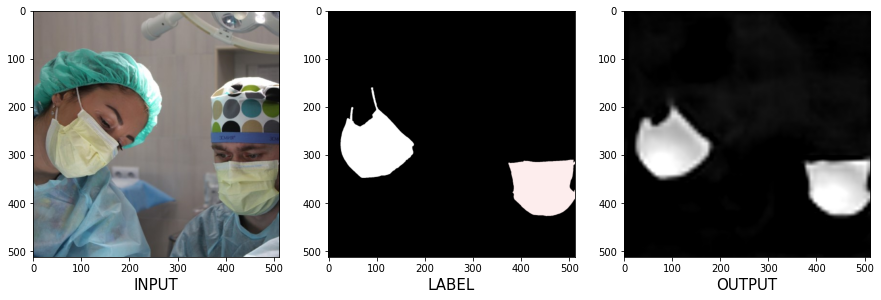

In [ ]:
import cv2

filename = '/content/DeepLabv3FineTuning/archive2/Images/pexels-極逵勻筠剋-_棘_棘克龜戟-2324837 (Custom).jpg'

img1 = cv2.imread(filename)
img2 = cv2.imread('/content/DeepLabv3FineTuning/archive2/Masks/pexels-極逵勻筠剋-_棘_棘克龜戟-2324837 (Custom).png')

img1_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(15, 15))

ax1 = plt.subplot(1, 3, 1)
ax1.imshow(img1_rgb)
plt.xlabel("INPUT", size = 15)

ax2 = plt.subplot(1, 3, 2)
ax2.imshow(img2_rgb)
plt.xlabel("LABEL", size = 15)

# sample execution (requires torchvision)
from PIL import Image
from torchvision import transforms
input_image = Image.open(filename)
print(input_image)
preprocess = transforms.Compose([
    transforms.ToTensor()
])

input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

# move the input and model to GPU for speed if available
if torch.cuda.is_available():
    print('Using GPU!')
    input_batch = input_batch.to('cuda')
    model.to('cuda')

with torch.no_grad():
    output = model(input_batch)['out'][0]
output_predictions = output[0]

# plot the semantic segmentation predictions of 21 classes in each color
img_size = input_image.size
data = output_predictions.cpu().numpy() * 255
print(data)
print(data.sum())
r = Image.fromarray(data).resize(img_size)

ax3 = plt.subplot(1, 3, 3)
ax3 = plt.imshow(r)
plt.xlabel("OUTPUT", size = 15)

plt.show()

## crack이 되는지 부터 확인 해야 할 듯
- 되긴 함

In [ ]:
%cd /content/DeepLabv3FineTuning

/content/DeepLabv3FineTuning


In [ ]:
!python main.py --data-directory CrackForest --exp_directory CFExp

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Epoch 1/20
----------
100% 24/24 [01:12<00:00,  3.03s/it]
Train Loss: 0.0364
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
100% 6/6 [0

## Crack Dataset

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=480x320 at 0x7F26D1AA8550>
Using GPU!
[[-0.07728636 -0.07728636 -0.07728636 ... -1.2099057  -1.2099057
  -1.2099057 ]
 [-0.07728636 -0.07728636 -0.07728636 ... -1.2099057  -1.2099057
  -1.2099057 ]
 [-0.07728636 -0.07728636 -0.07728636 ... -1.2099057  -1.2099057
  -1.2099057 ]
 ...
 [24.869083   24.869083   24.869083   ...  2.0871072   2.0871072
   2.0871072 ]
 [24.869083   24.869083   24.869083   ...  2.0871072   2.0871072
   2.0871072 ]
 [24.869083   24.869083   24.869083   ...  2.0871072   2.0871072
   2.0871072 ]]
3871240.5


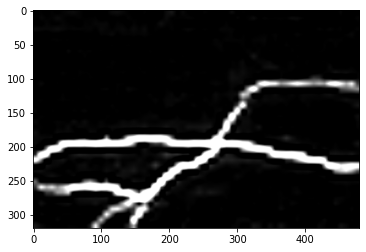

In [ ]:
import torch
import numpy as np
import cv2

model = torch.load("/content/DeepLabv3FineTuning/CFExp/weights.pt")
model.eval()

filename = '/content/DeepLabv3FineTuning/CrackForest/Images/002.jpg'

# sample execution (requires torchvision)
from PIL import Image
from torchvision import transforms
input_image = Image.open(filename)
print(input_image)
preprocess = transforms.Compose([
    transforms.ToTensor()
])

input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

# move the input and model to GPU for speed if available
if torch.cuda.is_available():
    print('Using GPU!')
    input_batch = input_batch.to('cuda')
    model.to('cuda')

with torch.no_grad():
    output = model(input_batch)['out'][0]
output_predictions = output[0]

# plot the semantic segmentation predictions of 21 classes in each color
img_size = input_image.size
data = output_predictions.cpu().numpy() * 255
print(data)
print(data.sum())
r = Image.fromarray(data).resize(img_size)

import matplotlib.pyplot as plt
plt.imshow(r)
plt.show()

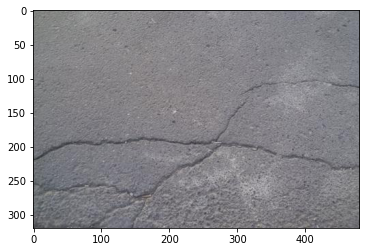

In [ ]:
img = Image.open('/content/DeepLabv3FineTuning/CrackForest/Images/002.jpg')
plt.imshow(img); plt.show()